# Step 1: Import Libraries

In [3]:
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 2: Read, Understand and Pre-process Train/Test Data

# Step 2.1: Read Data

In [4]:
data = pd.read_csv('Covid.csv')

In [5]:
data.head(10)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,TYPE
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,ALLERGY
1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,ALLERGY
2,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,ALLERGY
3,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,ALLERGY
4,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,ALLERGY
5,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,ALLERGY
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,ALLERGY
7,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,ALLERGY
8,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,ALLERGY
9,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,ALLERGY


# Step 2.2: Understand Data

In [6]:
data.dtypes

COUGH                    int64
MUSCLE_ACHES             int64
TIREDNESS                int64
SORE_THROAT              int64
RUNNY_NOSE               int64
STUFFY_NOSE              int64
FEVER                    int64
NAUSEA                   int64
VOMITING                 int64
DIARRHEA                 int64
SHORTNESS_OF_BREATH      int64
DIFFICULTY_BREATHING     int64
LOSS_OF_TASTE            int64
LOSS_OF_SMELL            int64
ITCHY_NOSE               int64
ITCHY_EYES               int64
ITCHY_MOUTH              int64
ITCHY_INNER_EAR          int64
SNEEZING                 int64
TYPE                    object
dtype: object

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12662    False
12663    False
12664    False
12665    False
12666    False
Length: 12667, dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12667 entries, 0 to 12666
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 12667 non-null  int64 
 1   MUSCLE_ACHES          12667 non-null  int64 
 2   TIREDNESS             12667 non-null  int64 
 3   SORE_THROAT           12667 non-null  int64 
 4   RUNNY_NOSE            12667 non-null  int64 
 5   STUFFY_NOSE           12667 non-null  int64 
 6   FEVER                 12667 non-null  int64 
 7   NAUSEA                12667 non-null  int64 
 8   VOMITING              12667 non-null  int64 
 9   DIARRHEA              12667 non-null  int64 
 10  SHORTNESS_OF_BREATH   12667 non-null  int64 
 11  DIFFICULTY_BREATHING  12667 non-null  int64 
 12  LOSS_OF_TASTE         12667 non-null  int64 
 13  LOSS_OF_SMELL         12667 non-null  int64 
 14  ITCHY_NOSE            12667 non-null  int64 
 15  ITCHY_EYES            12667 non-null

In [9]:
data.columns.name="index"
print("Train Dataset:")
print(data)

Train Dataset:
index  COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
0          0             0          0            1           0            1   
1          0             0          1            1           1            1   
2          0             0          1            1           1            0   
3          1             1          1            0           0            1   
4          1             1          0            1           0            1   
...      ...           ...        ...          ...         ...          ...   
12662      1             0          0            1           0            0   
12663      1             1          0            1           1            0   
12664      0             0          1            0           1            0   
12665      0             0          0            1           1            1   
12666      1             1          0            0           0            1   

index  FEVER  NAUSEA  VOMITING  DIAR

In [10]:
data.describe()

index,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING
count,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000
mean,0.512829,0.507066,0.507934,0.508408,0.427962,0.431199,0.252388,0.216863,0.220968,0.215284,0.213705,0.214968,0.395595,0.397411,0.254993,0.252309,0.253493,0.252309,0.517328
std,0.499855,0.499970,0.499957,0.499949,0.494803,0.495263,0.434400,0.412125,0.414915,0.411035,0.409937,0.410816,0.488997,0.489382,0.435875,0.434355,0.435028,0.434355,0.499719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print("Train Data Set Columns:")
trainDatadf=pd.DataFrame(data)
trainDataIndex=trainDatadf.columns
print(trainDataIndex)

print("\n")
print("Number of instances in Train Dataset")
print("Train Instances: %s"% (len(trainDatadf.index)))

Train Data Set Columns:
Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'TYPE'],
      dtype='object', name='index')


Number of instances in Train Dataset
Train Instances: 12667


In [12]:
trainDatadf

index,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,TYPE
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,ALLERGY
1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,ALLERGY
2,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,ALLERGY
3,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,ALLERGY
4,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12662,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,FLU
12663,1,1,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,FLU
12664,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,FLU
12665,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,FLU


<AxesSubplot:ylabel='FEVER'>

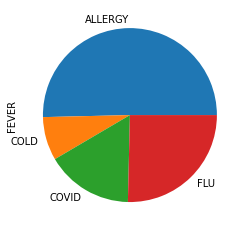

In [13]:
data.groupby('TYPE').FEVER.count().plot(kind='pie')

<AxesSubplot:ylabel='TYPE'>

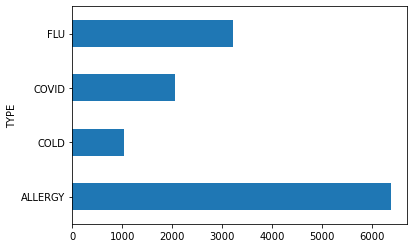

In [14]:
data.groupby('TYPE').FEVER.count().plot(kind='barh')

<AxesSubplot:xlabel='index', ylabel='index'>

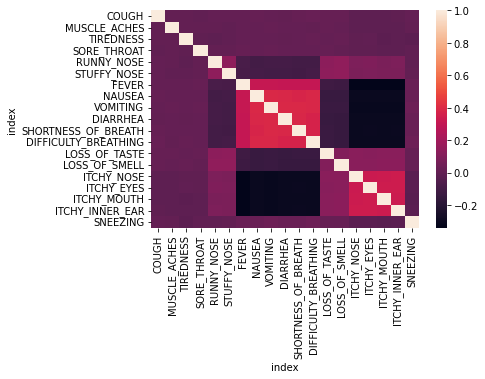

In [15]:
sns.heatmap(data.corr(),annot=False)

<AxesSubplot:xlabel='TYPE'>

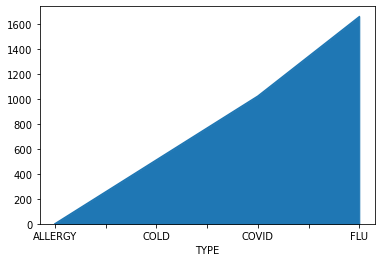

In [16]:
data.groupby('TYPE').FEVER.sum().plot(kind='area')

<AxesSubplot:xlabel='FEVER', ylabel='TYPE'>

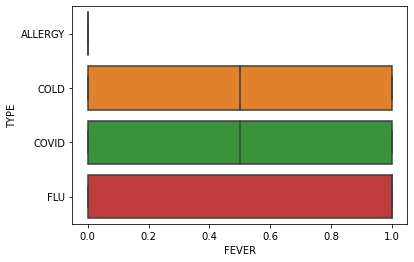

In [17]:
sns.boxplot(x='FEVER',y='TYPE',data=data)

In [18]:
q=data.drop_duplicates()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


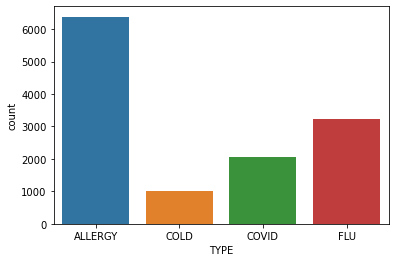

In [19]:
sns.countplot(data.TYPE)
plt.show()

<AxesSubplot:>

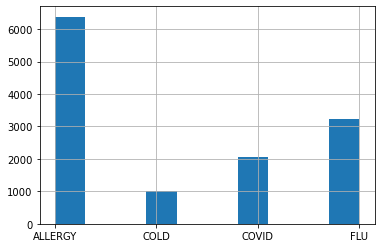

In [20]:
data.TYPE.hist()

<AxesSubplot:>

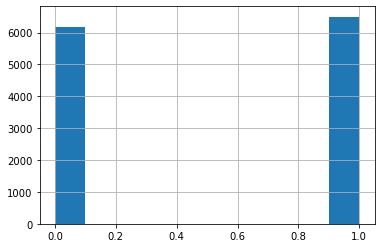

In [21]:
data.COUGH.hist()

# Pre-processed data

In [22]:
preprocessed_dataset = data.fillna('0')

print("Train dataset before pre-processing:")
print("=========================================\n")
print(data)

print("\n\n\nTrain dataset after pre-processing:")
print("=========================================\n")
print(preprocessed_dataset)

preprocessed_dataset.head()

Train dataset before pre-processing:

index  COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
0          0             0          0            1           0            1   
1          0             0          1            1           1            1   
2          0             0          1            1           1            0   
3          1             1          1            0           0            1   
4          1             1          0            1           0            1   
...      ...           ...        ...          ...         ...          ...   
12662      1             0          0            1           0            0   
12663      1             1          0            1           1            0   
12664      0             0          1            0           1            0   
12665      0             0          0            1           1            1   
12666      1             1          0            0           0            1   

index  FEVER 

index,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,TYPE
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,ALLERGY
1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,ALLERGY
2,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,ALLERGY
3,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,ALLERGY
4,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,ALLERGY


# Train ML Algorithms using Data

In [23]:
x = preprocessed_dataset.iloc[:, :-1].values
y = preprocessed_dataset.iloc[:, -1:].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train ML Algorithms using Random Forest Classifier


In [25]:
randomForest=RandomForestClassifier()
randomForest.fit(x_train,y_train)
RF = randomForest.predict(x_test)
accuracy_score(y_test, RF)

C:\Users\DELL\AppData\Local\Temp/ipykernel_11900/3108075893.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(x_train,y_train)


0.9033149171270718

# Train ML Algorithms using Logistic Regression

In [26]:
logisticRegression=LogisticRegression()
logisticRegression.fit(x_train,y_train)
LR = logisticRegression.predict(x_test)
accuracy_score(y_test, LR)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9471191791633781

# Train ML Algorithms using linearSvc

In [27]:
linearSvc=LinearSVC()
linearSvc.fit(x_train,y_train)
LS = linearSvc.predict(x_test)
accuracy_score(y_test, LS)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9419889502762431

# Train ML Algorithms using BernoulliNB


In [28]:
bernoulliNB=BernoulliNB()
bernoulliNB.fit(x_train,y_train)
NB = bernoulliNB.predict(x_test)
accuracy_score(y_test, NB)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9479084451460142

# Save the Trained Model as Pickle File

In [31]:
filename = 'covidd-model.sav'
pickle.dump(randomForest, open(filename, 'wb'))

# Load the Trained Model

In [32]:
loadBM = pickle.load(open('covidd-model.sav', 'rb'))

# Take Input from User

In [37]:
COUGH=input("0 = no high BP 1 = high BP")
MUSCLE_ACHES=input("0 = no high cholesterol 1 = high cholesterol")
TIREDNESS=input("0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years")
SORE_THROAT=input("Please enter your Body Mass Index(20-50):")
RUNNY_NOSE=input("Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes:")
STUFFY_NOSE=input("(Ever told) you had a stroke. 0 = no 1 = yes")
FEVER=input("coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes:")
NAUSEA=input("physical activity in past 30 days - not including job 0 = no 1 = yes")
VOMITING=input("Consume Fruit 1 or more times per day 0 = no 1 = yes")
DIARRHEA=input("Consume Vegetables 1 or more times per day 0 = no 1 = yes:")
SHORTNESS_OF_BREATH=input("Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes")
DIFFICULTY_BREATHING=input("Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes:")
LOSS_OF_TASTE=input("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes:")
LOSS_OF_SMELL=input("Would you say that in general your health is: scale (1-5) 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor:")
ITCHY_NOSE=input("Now thinking about your mental health, which includes stress,depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days:")
ITCHY_EYES=input("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days:")
ITCHY_MOUTH=input("Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes:")
ITCHY_INNER_EAR=input("0 = female 1 = male:")
SNEEZING=input("0 = female 1 = male:")


0 = no high BP 1 = high BP0
0 = no high cholesterol 1 = high cholesterol1
0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years0
Please enter your Body Mass Index(20-50):1
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes:0
(Ever told) you had a stroke. 0 = no 1 = yes1
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes:1
physical activity in past 30 days - not including job 0 = no 1 = yes1
Consume Fruit 1 or more times per day 0 = no 1 = yes1
Consume Vegetables 1 or more times per day 0 = no 1 = yes:0
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes0
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes:0
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes:1
Would you say that in gene

In [38]:
print("user input \n")
newdf=pd.DataFrame({"HighBP":COUGH,"HighChol":MUSCLE_ACHES,"CholCheck":TIREDNESS,"BMI":SORE_THROAT,"Smoker":RUNNY_NOSE,
                    "Stroke":STUFFY_NOSE,"HeartDiseaseorAttack":FEVER,"PhysActivity":NAUSEA,
                    "Fruits":VOMITING,"Veggies":DIARRHEA,"HvyAlcoholConsump":SHORTNESS_OF_BREATH,"AnyHealthcare":DIFFICULTY_BREATHING,
                    "NoDocbcCost":LOSS_OF_TASTE,"GenHlth":LOSS_OF_SMELL,"MentHlth":ITCHY_NOSE,"PhysHlth":ITCHY_EYES,
                    "DiffWalk":ITCHY_MOUTH,"Sex":ITCHY_INNER_EAR,"Sexx":SNEEZING},index=[0])
print(newdf)

user input 

  HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack  \
0      0        1         0   1      0      1                    1   

  PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost  \
0            1      1       0                 0             0           1   

  GenHlth MentHlth PhysHlth DiffWalk Sex Sexx  
0       0        0        1        1   1    0  


In [39]:
data.TYPE.values

array(['ALLERGY', 'ALLERGY', 'ALLERGY', ..., 'FLU', 'FLU', 'FLU'],
      dtype=object)

In [40]:
outputPredictionBM= loadBM.predict(newdf)

if outputPredictionBM=='ALLERGY':
    TYPE= "Patient has allergy"
    
elif outputPredictionBM=='COLD':
    TYPE="Patient has covid"

elif outputPredictionBM=='COVID':
    TYPE="Patient has covid"
    
elif outputPredictionBM=='FLU':
    TYPE="Patient has FLU"

print("\n Prediction: %s"%TYPE)


 Prediction: Patient has FLU
